In [142]:
import numpy as np

In [218]:
dataset = [
#     [3.9, 76, [0, 1, 0]],
#     [4.25, 93, [1, 0, 0]],
#     [2.85, 90, [0, 0, 1]],
#     [3, 75, [0, 0, 1]],
#     [4.25, 75, [0, 1, 0]],
#     [3.75, 88, [0, 1, 0]],
#     [3, 70, [0, 0, 1]],
#     [2.5, 90, [0, 0, 1]],
#     [3.75, 82, [0, 1, 0]],
#     [5, 85, [1, 0, 0]],
#     [2.5, 70, [0, 0, 1]],
    [4, 82, [0, 1, 0]],
    [3, 80, [0, 0, 1]],
    [2.5, 75, [0, 0, 1]],
    [3.4, 90, [0, 1, 0]],
    [4.2, 88, [1, 0, 0]],
    [5, 92, [1, 0, 0]],
    [2.7, 99, [0, 0, 1]],
    [3.3, 85, [0, 0, 1]],
    [4.2, 72, [0, 1, 0]],
    [3.6, 80, [0, 1, 0]],
    [2.9, 85, [0, 0, 1]],
    [3.9, 85, [0, 1, 0]],
    [4.5, 99, [1, 0, 0]],
    [4.7, 90, [1, 0, 0]],
    [4.6, 80, [1, 0, 0]],
    [4.6, 75, [0, 1, 0]],
    [3.4, 64, [0, 0, 1]],
    [4, 95, [1, 0, 0]],
    [4.1, 86, [0, 1, 0]],
    [4.5, 90, [1, 0, 0]],
    [3.7, 70, [0, 0, 1]],
    [3.2, 81, [0, 0, 1]]
]

In [165]:
class1 = [-250, 40, 1]
class2 = [-220, 40, 1]
class3 = [-220, 40, 1]
estim_class = [class1, class2, class3]

In [166]:
X_matrix=np.array([data[:2] for data in dataset])
X_matrix=np.hstack((np.ones((len(X_matrix),1)),X_matrix))

Y_matrix=np.array([data[-1] for data in dataset])
W_matrix=np.array(estim_class).T

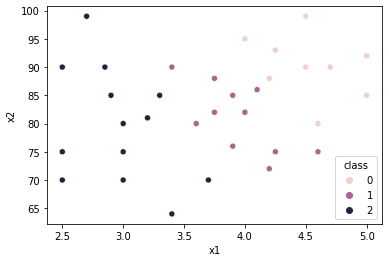

In [221]:
import seaborn as sns 
import pandas as pd

df = pd.DataFrame(X_matrix, columns=["const", "x1", "x2"])

df["class"] = pd.Series(targ)# .apply(lambda x: "red" if x==1 else "blue")


sns.scatterplot(x=df["x1"], y=df["x2"], hue=df["class"])

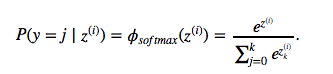

In [231]:
from IPython.display import Image
Image(filename='/home/ubenz/Documents/project/custom_optim_reg/img/softmax.png',width=300, height=200)

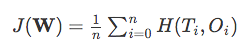

In [232]:
Image(filename='/home/ubenz/Documents/project/custom_optim_reg/img/loss_func.png',width=300, height=200)

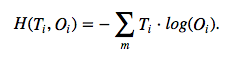

In [233]:
Image(filename='/home/ubenz/Documents/project/custom_optim_reg/img/coss_entropy.png',width=300, height=200)

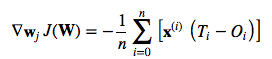

In [234]:
Image(filename='/home/ubenz/Documents/project/custom_optim_reg/img/gradient.png',width=300, height=200)

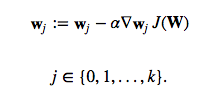

In [235]:
Image(filename='/home/ubenz/Documents/project/custom_optim_reg/img/gradient_update.png',width=300, height=200)

In [219]:
from scipy.special import softmax

# code that we only need to execute one time
index_true_label=np.argmax(Y_matrix,axis=1)

alpha=0.0005
i=0
loss_iter=[]

while i <200000:
    
    # compute param x training instances for each class
    matrix_result=np.dot(X_matrix,W_matrix)
    # we compute soft max to get probas over class (mutually exclusive)
    soft_result=softmax(matrix_result,axis=1)
    
    index_row_max=np.argmax(soft_result,axis=1)
    accuracy = np.sum(index_row_max==index_true_label)/len(index_row_max)
    loss_iter.append([1-accuracy,i])
    
    if i%20000==0:
      
        # we check the actual label and predicted label
        print(f"Accuracy of {accuracy} at iteration {i}")
        print()
        
    # return for each training instances the the highest proba
    soft_max_predicted = soft_result[np.arange(len(soft_result)), index_true_label]

    # compute the gradient of the derivative
    T_O_loss = Y_matrix - soft_result
    sum_loss = np.dot(T_O_loss.T, X_matrix)
    gradient = -(sum_loss/len(dataset))
    
    # updating params with gradient
    old_param = np.array(W_matrix.T)
    new_params = old_param - (alpha * gradient)
    W_matrix = np.array(new_params).T
    
    i+=1

Accuracy of 0.35294117647058826 at iteration 0

Accuracy of 0.8235294117647058 at iteration 20000

Accuracy of 0.8235294117647058 at iteration 40000

Accuracy of 0.8529411764705882 at iteration 60000

Accuracy of 0.8529411764705882 at iteration 80000

Accuracy of 0.9117647058823529 at iteration 100000

Accuracy of 0.9117647058823529 at iteration 120000

Accuracy of 0.9117647058823529 at iteration 140000

Accuracy of 0.9117647058823529 at iteration 160000

Accuracy of 0.9117647058823529 at iteration 180000



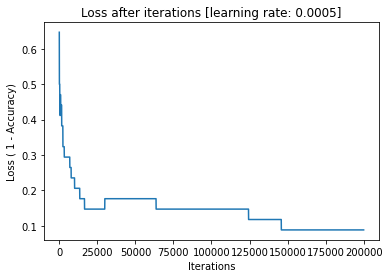

In [216]:
from matplotlib import pyplot as plt
plt.plot(np.array(loss_iter)[:,1], np.array(loss_iter)[:,0])
plt.title(f"Loss after iterations [learning rate: {alpha}]");
plt.xlabel("Iterations");
plt.ylabel("Loss ( 1 - Accuracy)");